# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json


df_WeRateDogs = pd.read_csv('twitter-archive-enhanced.csv')


In [2]:
df_WeRateDogs.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1333,705442520700944385,NaN,NaN,2016-03-03 17:19:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He only wakes up to switch gea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705442520...,12,10,Cooper,None,None,None,None
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None
514,811627233043480576,NaN,NaN,2016-12-21 17:39:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Augie. He's a savage. Doesn't give a h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811627233...,10,10,Augie,None,None,None,None
2322,666430724426358785,NaN,NaN,2015-11-17 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666430724...,6,10,None,None,None,None,None
590,799297110730567681,NaN,NaN,2016-11-17 17:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's quite the jokester. Take...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799297110...,11,10,Jeffrey,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Download `image_predictions.tsv` to local machine
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
# read tsv file to dataframe
df_image = pd.read_csv('image_predictions.tsv', sep='\t')
                       
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1620,802952499103731712,https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg,1,chow,0.944032,True,golden_retriever,0.017240,True,Pomeranian,0.012085,True
257,670778058496974848,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,1,pug,0.776612,True,Brabancon_griffon,0.112032,True,boxer,0.039051,True
915,701214700881756160,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
1281,750147208377409536,https://pbs.twimg.com/media/CmkO57iXgAEOxX9.jpg,1,pug,0.977765,True,Boston_bull,0.004794,True,French_bulldog,0.004573,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
consumer_key = 'Ed9fpESRDCXwUOkW9rTqKpx6S'
consumer_secret = 'Yx0Wwdsmuz1iGxdiXeuB7TAiW0beP8Gu2tM5M5Cwfwq1coAkTo'
access_token = '344894009-VtCW2MMiDwqDlRFmnYBTycTeA7oknLDK9cJDhSjp'
access_secret = 'HUaTcgKeIg88Jmee6k1jrE1J0MxmRjoEVUEajFYDsPkTE'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df_WeRateDogs.tweet_id.values
len(tweet_ids)


2356

4. Could not get Elevated Developer Access to Twitter API so `tweet_json.txt` file was downloaded to local machine from Udacity classroom

In [6]:
# Read the JSON file
tweets_list = []
with open('tweet_json.txt', 'r') as file:
  for line in file:
    data = json.loads(line)
    tweets_list.append(data)
df_tweets = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])

In [7]:
df_tweets.sample(5)

,id,retweet_count,favorite_count
689,787397959788929025,3300,12120
722,782969140009107456,8521,26949
1575,687399393394311168,702,2081
2120,670403879788544000,173,460
68,879050749262655488,4941,23022


In [8]:
df_WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [11]:
df_WeRateDogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
sum(df_WeRateDogs.duplicated())

0

In [13]:
sum(df_image.duplicated())

0

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues


1.Id name in `df_tweets` is different from other the id names in other tables

2.Drop identified retweets and replies

3.Datatype Issues (timestamp column)

4.Remove columns that will not be used

5.Missing, wrong and incomplete names of Dogs

6.Drop Missing, wrong and incomplete names of Dogs

7.Source column has excess and unnecessary information

8.Columns contains strings that have already been extracted to form new columns


### Tidiness issues

1.A single column for ratings

2.The different stages for each dog in `twitter-archive-enhanced` can be represented under one column (dog_stage)

3.Group p1,p2 and p3 under one column , p1_dog,p2_dog,p3_dog another column

4.retweet_count, favorite_count, jpg_url, breed and confidence should be part of `twitter-archive-enhanced`


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of original pieces of data

df_WeRateDogs_clean = df_WeRateDogs.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

## Quality Issues

### Issue #1: Id name in `df_tweets` is different from other the id names in other tables

#### Define: Rename id column to tweets_id in df_tweets

#### Code

In [15]:
df_tweets_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

#### Test

In [16]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issue #2: Drop identified retweets and replies

#### Define: Remove rows that contain retweets and replies


#### Code

In [17]:
# index of rows that contain retweets
retweets = df_WeRateDogs_clean[pd.notnull(df_WeRateDogs_clean['retweeted_status_id'])].index

retweets

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [18]:
# index of rows that contain replies
replies = df_WeRateDogs_clean[pd.notnull(df_WeRateDogs_clean['in_reply_to_status_id'])].index

replies

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [19]:
# drop retweets and replies rows 
def drop_row_col(dframe, row_col, axis=0):
    dframe.drop(row_col, axis=axis, inplace=True)

drop_row_col(df_WeRateDogs_clean, retweets)
drop_row_col(df_WeRateDogs_clean, replies)

#### Test

In [20]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #3: Datatype Issues (timestamp column)

#### Define: Convert timestamp column to datetime datatype

#### Code

In [21]:
df_WeRateDogs_clean.timestamp = pd.to_datetime(df_WeRateDogs_clean.timestamp)

#### Test

In [22]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Issue #4: Remove columns that will not be used

#### Define: Drop unnecessary columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

#### Code

In [23]:
x_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']

# Drop columns using function
def drop_columns(cols, Dframe):
    for col in cols:
        Dframe.drop(columns=col, axis=1, inplace=True)
        
drop_columns(x_columns, df_WeRateDogs_clean)

#### Test

In [24]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.6+ KB


### Issue #5: Missing, wrong or incomplete names of Dogs

#### Define: There are dogs names  registered in 'None' as well as lowercase letters in the form of single alphabets, adverbs, adjectives. These are incorrect names and have to be replaced with Null values. 

#### Code

In [25]:
# Identify all dog names in lowercase
wrong_name = df_WeRateDogs_clean['name'].str.islower()

# Replace wrong_name with Nan
df_WeRateDogs_clean.loc[wrong_name, 'name']= np.nan

# Replace all 'None' dog names with Nan
df_WeRateDogs_clean.replace('None', np.nan, inplace=True)


#### Test

In [26]:
df_WeRateDogs_clean.name.value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
            ..
Tyrone       1
Tyrus        1
Sobe         1
Skittles     1
Pinot        1
Name: name, Length: 929, dtype: int64

### Issue #6: Drop Missing, wrong and incomplete names of Dogs

#### Define: Drop rows with dog names as Nan

#### Code

In [29]:
df_WeRateDogs_clean = df_WeRateDogs_clean.dropna(subset=['name'])

#### Test

In [30]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1390 non-null   int64              
 1   timestamp           1390 non-null   datetime64[ns, UTC]
 2   source              1390 non-null   object             
 3   text                1390 non-null   object             
 4   rating_numerator    1390 non-null   int64              
 5   rating_denominator  1390 non-null   int64              
 6   name                1390 non-null   object             
 7   doggo               42 non-null     object             
 8   floofer             5 non-null      object             
 9   pupper              125 non-null    object             
 10  puppo               16 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 130.3+ KB


### Issue #7: Source column has excess unnecessary information

#### Define: Extract the source of tweet between the greater than sign(>) and the anchor tag(<\a>)

#### Code

In [31]:
df_WeRateDogs_clean["tweet_source"] = df_WeRateDogs_clean["source"].str.extract('(?:.*>)([a-zA-Z-\s]+)(?:.*<)')

<ipython-input-31-ab966585b793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WeRateDogs_clean["tweet_source"] = df_WeRateDogs_clean["source"].str.extract('(?:.*>)([a-zA-Z-\s]+)(?:.*<)')


#### Test

In [32]:
df_WeRateDogs_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_source
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN,Twitter for iPhone


### Issue #8: Columns contains strings that have already been extracted to form new columns

#### Define: Drop source and text columns

#### Code

In [34]:
df_WeRateDogs_clean.drop(['source', 'text'], axis=1, inplace=True)

C:\Users\Quist\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test

In [35]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1390 non-null   int64              
 1   timestamp           1390 non-null   datetime64[ns, UTC]
 2   rating_numerator    1390 non-null   int64              
 3   rating_denominator  1390 non-null   int64              
 4   name                1390 non-null   object             
 5   doggo               42 non-null     object             
 6   floofer             5 non-null      object             
 7   pupper              125 non-null    object             
 8   puppo               16 non-null     object             
 9   tweet_source        1390 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 119.5+ KB


## Tidiness Issues

### Issue #1: A single column for ratings

#### Define: Rating_numerator and rating_denominator columns should be aggregated to give single dog_rating column

#### Code

In [40]:
# Create ratings column that Divides rating_numerator by rating_denominator 
df_WeRateDogs_clean['ratings'] = (df_WeRateDogs_clean.rating_numerator/df_WeRateDogs_clean.rating_denominator)

# Drop rating_numerator and rating_denominator columns
df_WeRateDogs_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

<ipython-input-40-0489b6c703ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WeRateDogs_clean['ratings'] = (df_WeRateDogs_clean.rating_numerator/df_WeRateDogs_clean.rating_denominator)


#### Test

In [42]:
df_WeRateDogs_clean.head()

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,tweet_source,ratings
0,892420643555336193,2017-08-01 16:23:56+00:00,Phineas,NaN,NaN,NaN,NaN,Twitter for iPhone,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,NaN,NaN,NaN,NaN,Twitter for iPhone,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,NaN,NaN,NaN,NaN,Twitter for iPhone,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Darla,NaN,NaN,NaN,NaN,Twitter for iPhone,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,NaN,NaN,NaN,NaN,Twitter for iPhone,1.2


### Issue #2: The different stages for each dog in twitter-archive-enhanced can be represented under one column (dog_stage)

#### Define: Group the different dog stages into one column called dog_stages

#### Code

In [49]:
# Create list for dog stages
dog_stages = ['doggo', 'floofer','pupper', 'puppo']

# Create dog_stages column
def join(x):
    return ', '.join(x.dropna().astype(str)) 

df_WeRateDogs_clean['dog_stages'] = df_WeRateDogs_clean[dog_stages].apply(join, axis=1)

In [51]:
# Delete doggo, floofer, pupper, puppo columns
y_columns = ['doggo', 'floofer','pupper', 'puppo']

def drop_column (cols, Dframe):
    for col in cols:
        Dframe.drop (columns=col, axis=1, inplace=True)

drop_columns(y_columns, df_WeRateDogs_clean)

#### Test

In [52]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   tweet_id      1390 non-null   int64              
 1   timestamp     1390 non-null   datetime64[ns, UTC]
 2   name          1390 non-null   object             
 3   tweet_source  1390 non-null   object             
 4   ratings       1390 non-null   float64            
 5   dog_stages    1390 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 76.0+ KB


### Issue #3: Group p1,p2 and p3 under one column , p1_dog,p2_dog,p3_dog another column

#### Define: Create breed and criteria columns for p1,p2 ,p3 and p1_dog,p2_dog,p3_dog respectively

#### Code

In [53]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [54]:
#create columns for breed and criteria
criteria = [(df_image_clean['p1_dog'] == True), (df_image_clean['p2_dog'] == True), (df_image_clean['p3_dog'] == True)]

breed = [(df_image_clean['p1']), (df_image_clean['p2'] ), (df_image_clean['p3'] )]

conf_pred =  [(df_image_clean['p1_conf']), (df_image_clean['p2_conf'] ), (df_image_clean['p3_conf'] )]

df_image_clean['breed'] = np.select(criteria, breed, default='none')

df_image_clean['confidence'] =  np.select(criteria, conf_pred, default=0)

In [55]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   p1          2075 non-null   object 
 4   p1_conf     2075 non-null   float64
 5   p1_dog      2075 non-null   bool   
 6   p2          2075 non-null   object 
 7   p2_conf     2075 non-null   float64
 8   p2_dog      2075 non-null   bool   
 9   p3          2075 non-null   object 
 10  p3_conf     2075 non-null   float64
 11  p3_dog      2075 non-null   bool   
 12  breed       2075 non-null   object 
 13  confidence  2075 non-null   float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


In [56]:
# Drop columns: p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog 

df_image_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

#### Test

In [57]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   breed       2075 non-null   object 
 4   confidence  2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


### Issue #4: retweet_count, favorite_count, jpg_url, breed and confidence should be part of twitter-archive-enhanced

#### Define:  Merge retweet_count, favorite_count, jpg_url, breed and confidence columns to df_WeRateDogs joining on tweet_id.

#### Code

In [59]:
# Merge jpg_url, breed and confidence columns to `df_WeRateDogs_clean` table
df_WeRateDogs_clean = pd.merge(df_WeRateDogs_clean, df_image_clean, 
                            on=['tweet_id'], how='left')

In [60]:
# Merge retweet_count, favorite_count columns to `df_WeRateDogs_clean` table
df_WeRateDogs_clean = pd.merge(df_WeRateDogs_clean, df_tweets_clean, 
                            on=['tweet_id'], how='left')

#### Test

In [61]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 1389
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1390 non-null   int64              
 1   timestamp       1390 non-null   datetime64[ns, UTC]
 2   name            1390 non-null   object             
 3   tweet_source    1390 non-null   object             
 4   ratings         1390 non-null   float64            
 5   dog_stages      1390 non-null   object             
 6   jpg_url         1349 non-null   object             
 7   img_num         1349 non-null   float64            
 8   breed           1349 non-null   object             
 9   confidence      1349 non-null   float64            
 10  retweet_count   1390 non-null   int64              
 11  favorite_count  1390 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(5)
memory usage: 141.2+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
df_WeRateDogs_clean.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [63]:
df = pd.read_csv('twitter_archive_master.csv')

In [64]:
df.describe()

,tweet_id,ratings,img_num,confidence,retweet_count,favorite_count
count,1.390000e+03,1390.000000,1349.000000,1349.000000,1390.000000,1390.000000
mean,7.441946e+17,1.207097,1.210526,0.487950,2766.655396,9354.294245
std,6.815130e+16,4.742211,0.574050,0.337151,3979.417288,11617.111118
min,6.664188e+17,0.200000,1.000000,0.000000,23.000000,107.000000
25%,6.805902e+17,1.000000,1.000000,0.180079,715.250000,2369.000000
50%,7.239588e+17,1.100000,1.000000,0.484855,1542.500000,4793.500000
75%,7.992387e+17,1.200000,1.000000,0.803293,3375.000000,12191.250000
max,8.924206e+17,177.600000,4.000000,0.999953,56625.000000,107956.000000


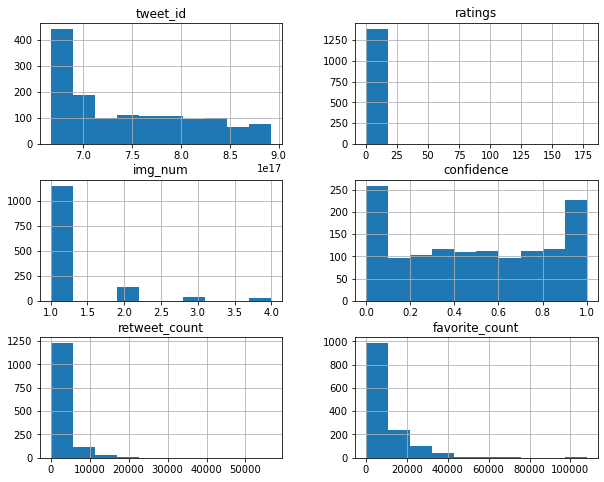

In [66]:
df.hist(figsize = (10,8));

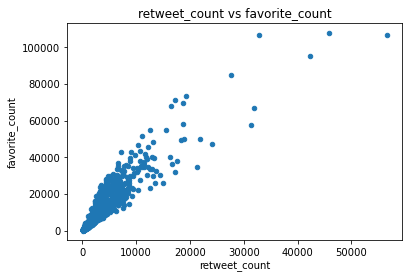

In [72]:
df.plot(x='retweet_count', y='favorite_count', kind='scatter');
plt.title('retweet_count vs favorite_count');


### Insights:
1.75% of dog ratings were 1.2

2.There were a lot of confidence in predition of breeds by the algorithm less than 0.1

3.There is a positive corelation between retweet count and favorite count

### Visualization

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

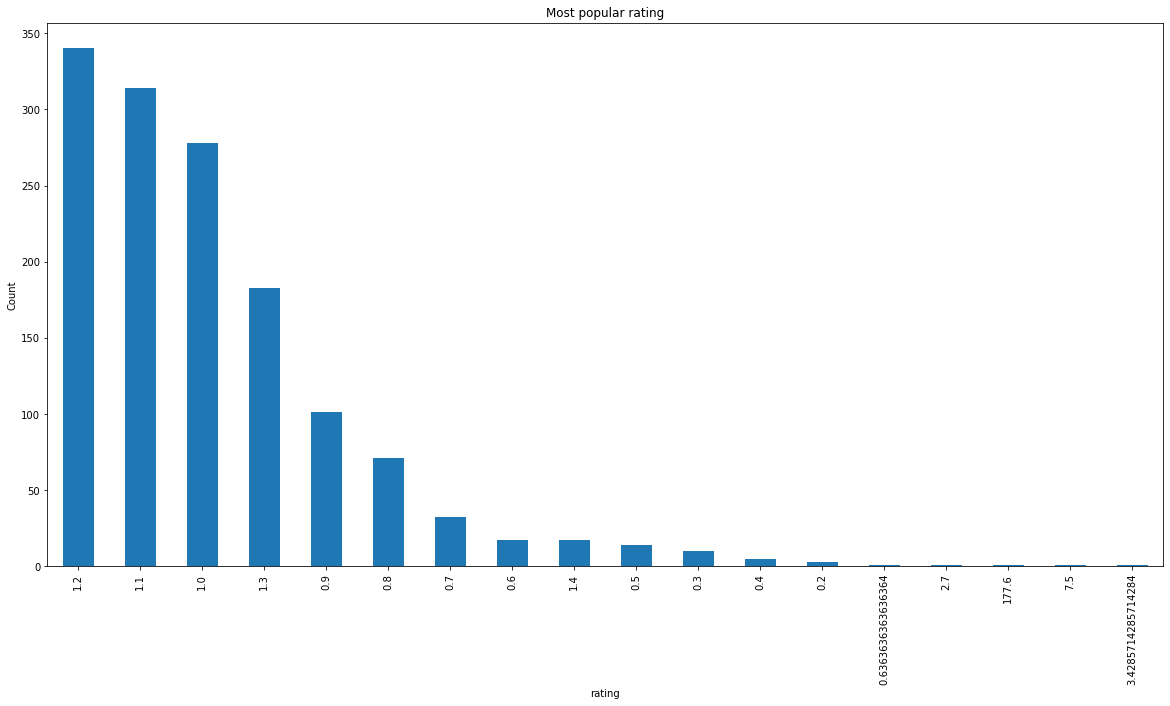

In [70]:
# what is the most popular rating in the dataset
df['ratings'].value_counts().plot(kind='bar', figsize=(20,10));
plt.title('Most popular rating');
plt.ylabel('Count');
plt.xlabel('rating');